In [4]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())
#dict_keys(['data',

C:\Users\Owner\Desktop\projects\ML\venv\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [5]:
X, y = mnist["data"], mnist["target"]
print(type(X))
#(70000, 784)

<class 'pandas.core.frame.DataFrame'>


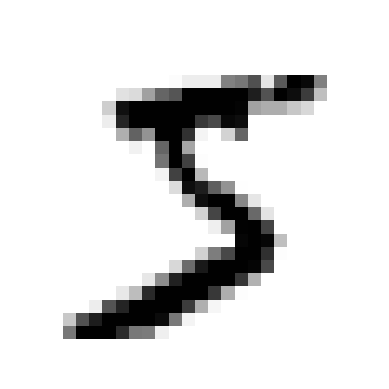

5


In [6]:
# visual one digit
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc[0]
#print(some_digit)
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(y[0])

In [7]:
# Note that the label is a string. We prefer numbers, so let’s cast y to integers:
y = y.astype(np.uint8)
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8


In [8]:
# SPLIT TRAIN AND TEST SET
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
# Training a Binary Classifier
#Let’s create the target vectors for
#this classification task:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [10]:
##   Stochastic Gradient Descent (SGD)- handle very large set very efficiently
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) # random
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
# test with one digit
is_five=sgd_clf.predict([some_digit])
print(is_five)

[ True]


C:\Users\Owner\Desktop\projects\ML\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [12]:
# Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3,shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

0.9669
0.91625
0.96785


In [13]:
from sklearn.model_selection import cross_val_score
res=cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(res)#array([0.96355, 0.93795, 0.95615])

[0.95035 0.96035 0.9604 ]


In [14]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [15]:
never_5_clf = Never5Classifier()
>>> cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [16]:
# set of predictors for Confusion MAtrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_5, y_train_pred))

[[53892   687]
 [ 1891  3530]]


In [18]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
pr=confusion_matrix(y_train_5, y_train_perfect_predictions)
print(pr)
""" array([[54579, 0],
[ 0, 5421]])""" # perfect classifier

[[54579     0]
 [    0  5421]]


' array([[54579, 0],\n[ 0, 5421]])'

In [19]:
print('a')

a


In [20]:
#PRecision and Recall
>>> from sklearn.metrics import precision_score, recall_score
>>> precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)
#0.7290850836596654
>>> recall_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1325)
#0.7555801512636044

0.6511713705958311

In [21]:
#To compute the F1 score, simply call the f1_score() function:
# The F1 score is the harmonic mean of precision and recall
>>> from sklearn.metrics import f1_score
>>> f1_score(y_train_5, y_train_pred)
#0.7420962043663375

0.7325171197343846